Importar los precios de Amazon desde Yahoo finance de los últimos 10 años y simular cien mil escenarios de los próximos 30 días para predecir la probabilidad de que el precio actual supere el 8%.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
!pip install yfinance
import yfinance as yf

/tmp/ipython-input-1997490609.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers,start='2015-11-04',end='2025-11-04')['Close']  # 10 años
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

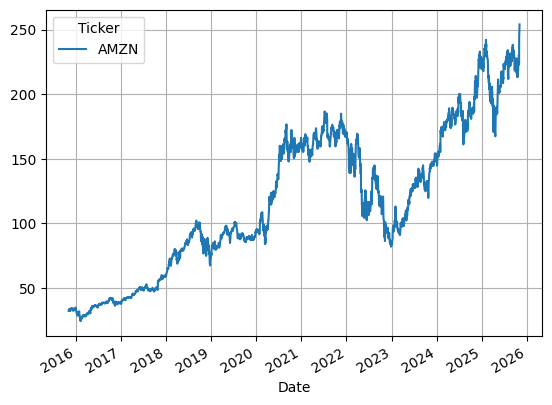

In [17]:
tickers=['AMZN']
data=yf.download(tickers,start='2015-11-04',end='2025-11-04')['Close']  # 10 años
data.plot(grid=True)

<Axes: xlabel='Date'>

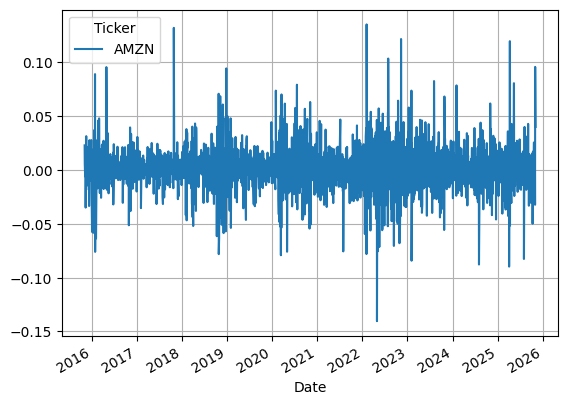

In [18]:
delta=data.pct_change().dropna()
delta.plot(grid=True)

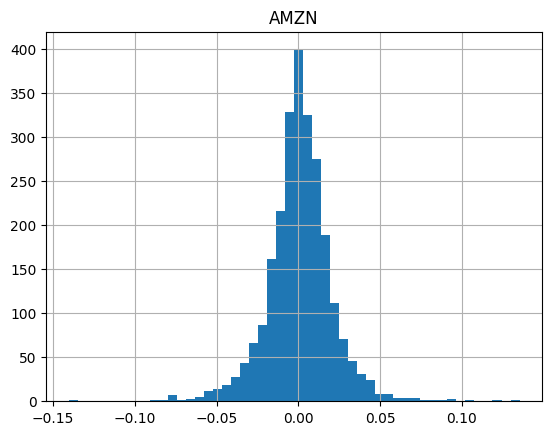

In [19]:
delta.hist(bins=50,grid=True);

In [20]:
N_dias=30
N_escenarios=100000
delta_AMZN=np.random.normal(delta['AMZN'].mean(),delta['AMZN'].std(),(N_dias,N_escenarios))
delta_AMZN[:2,:10]

array([[ 3.18332695e-02,  6.13819984e-03,  9.60743418e-03,
         4.24912529e-02,  1.10844960e-02,  3.63349467e-02,
         3.91957081e-02,  2.43039330e-02,  8.72350642e-03,
         2.58019352e-02],
       [ 3.70298607e-02,  1.10047179e-02,  8.01899628e-03,
        -3.00938301e-02, -2.81538524e-05,  3.55682417e-04,
        -6.45758095e-03,  1.36768497e-02, -1.26338747e-02,
         1.23994008e-02]])

In [21]:
rango_tiempo=pd.date_range('2025-11-05',periods=N_dias)
rango_tiempo

DatetimeIndex(['2025-11-05', '2025-11-06', '2025-11-07', '2025-11-08',
               '2025-11-09', '2025-11-10', '2025-11-11', '2025-11-12',
               '2025-11-13', '2025-11-14', '2025-11-15', '2025-11-16',
               '2025-11-17', '2025-11-18', '2025-11-19', '2025-11-20',
               '2025-11-21', '2025-11-22', '2025-11-23', '2025-11-24',
               '2025-11-25', '2025-11-26', '2025-11-27', '2025-11-28',
               '2025-11-29', '2025-11-30', '2025-12-01', '2025-12-02',
               '2025-12-03', '2025-12-04'],
              dtype='datetime64[ns]', freq='D')

In [22]:
delta_AMZN=pd.DataFrame(delta_AMZN,index=rango_tiempo)
delta_AMZN

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2025-11-05,0.031833,0.006138,0.009607,0.042491,0.011084,0.036335,0.039196,0.024304,0.008724,0.025802,...,-0.028140,0.047279,-0.052515,-0.001609,0.000129,0.038143,0.017729,-0.005467,-0.017079,-0.008397
2025-11-06,0.037030,0.011005,0.008019,-0.030094,-0.000028,0.000356,-0.006458,0.013677,-0.012634,0.012399,...,0.006685,-0.011715,0.000486,0.015207,-0.018547,0.025350,-0.008517,-0.006016,0.010856,0.000735
2025-11-07,0.011855,-0.005596,0.005751,-0.021000,0.010843,-0.009665,0.030587,0.012042,-0.027068,-0.035507,...,0.002312,0.020798,0.004048,-0.041735,-0.044887,0.005056,0.034347,0.013534,0.005174,0.006289
2025-11-08,-0.008218,-0.017694,0.014351,-0.028552,0.004135,0.019490,-0.001350,-0.011441,0.013550,-0.066612,...,-0.007048,0.018674,-0.016754,0.046548,0.018436,-0.008686,-0.008068,0.010535,-0.015177,-0.002800
2025-11-09,0.000021,0.014177,0.000537,-0.032359,0.003033,-0.016876,-0.012290,0.002334,-0.001345,0.019885,...,-0.000601,-0.044054,0.010314,-0.005371,-0.006177,-0.017639,-0.005058,0.022679,-0.032266,-0.008750
2025-11-10,-0.007933,0.023544,0.026144,-0.003668,-0.001333,0.020345,0.010159,-0.044878,-0.024592,0.015679,...,0.026432,0.001063,-0.021618,0.038711,0.009635,0.023309,0.016625,-0.009524,-0.003659,-0.000276
2025-11-11,-0.011980,-0.020152,-0.013165,-0.069093,-0.001393,0.014484,-0.034616,0.014615,-0.013564,-0.032519,...,-0.015120,0.039401,-0.027625,-0.010441,-0.009920,-0.000863,-0.043538,0.002685,-0.005059,-0.005250
2025-11-12,0.020414,-0.020903,0.024806,0.000504,0.000239,0.024886,0.020602,0.006160,0.021506,-0.012609,...,-0.005247,-0.002322,-0.028331,-0.026232,0.007642,0.016584,0.006202,0.026010,-0.017852,-0.009153
2025-11-13,-0.006867,0.024517,-0.011580,0.011075,-0.023903,-0.019600,0.005868,-0.006386,0.030757,-0.025136,...,0.012501,0.010377,0.070494,0.020403,0.028417,-0.015855,0.020686,0.001295,-0.007483,0.021207
2025-11-14,-0.004739,-0.047906,0.009570,-0.000786,0.006034,0.003489,0.015247,-0.000343,0.012139,0.005847,...,0.010625,-0.007221,0.001968,-0.025309,0.021729,-0.007390,0.021040,-0.008984,-0.021574,-0.002799


In [23]:
precios_AMZN=data['AMZN'].iloc[-1]*((delta_AMZN+1).cumprod())
precios_AMZN.iloc[:2,:5]

,0,1,2,3,4
2025-11-05,262.085650,255.559103,256.440288,264.792778,256.815462
2025-11-06,271.790646,258.371459,258.496682,256.824149,256.808232


<Axes: >

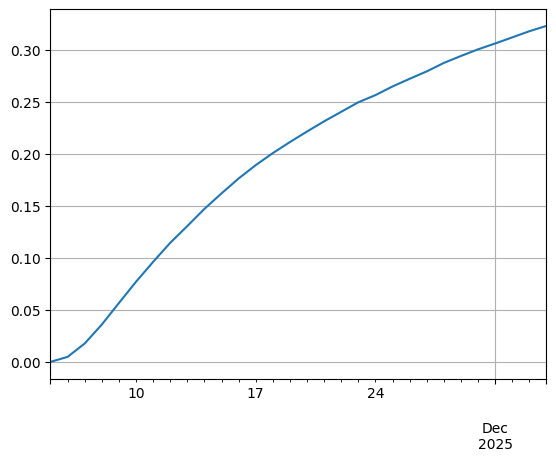

In [24]:
B_AMZN=precios_AMZN>data['AMZN'].iloc[-1]*1.08
proba_AMZN=B_AMZN.mean(axis=1)
proba_AMZN.plot(grid=True)

In [25]:
print('Último precio conocido (P0):', data['AMZN'].iloc[-1])
print('Probabilidad al día 30 de superar +8%:', proba_AMZN.iloc[-1])

Último precio conocido (P0): 254.0
Probabilidad al día 30 de superar +8%: 0.32318


### Resultados

En este ejercicio se importaron los precios históricos de Amazon (AMZN) de los últimos 10 años desde *Yahoo Finance* y se realizó una simulación Montecarlo con 100,000 escenarios para proyectar los posibles valores de los próximos 30 días.

La simulación se basó en los retornos porcentuales diarios calculados a partir de los datos históricos, asumiendo que éstos siguen una distribución normal con la misma media y desviación estándar observadas.  
A partir de esos retornos simulados, se construyeron trayectorias de precios futuros según la relación:

$
P_k = P_0 \prod_{i=1}^{k}(1+\Delta_i)
$

donde $ P_0 $ es el último precio conocido y $ \Delta_i $ las variaciones simuladas.

Finalmente, se estimó la probabilidad de que el precio supere un 8% respecto al valor actual.  
La gráfica muestra cómo esta probabilidad aumenta con los días de simulación, hasta alcanzar un valor aproximado cercano al 32% al día 30.

En conclusión, con base en el comportamiento histórico de los precios de Amazon, la simulación sugiere que existe una probabilidad moderada de que el precio aumente más de un 8% durante el próximo mes, aunque como todo modelo estocástico, esta estimación depende de los supuestos estadísticos y del comportamiento pasado del mercado.